
# MVP: *Machine Learning & Analytics*
**Autor:** Leandro Ribeiro de Castro  

**Data:** 20/09/2025

**Matrícula:** 4052025000159

**Dataset:** [Default of Credit Card Clients](https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients)

# 1. Definição do Problema

### 1.1. Objetivo:
O principal objetivo deste projeto é desenvolver e avaliar modelos de Machine Learning capazes de prever se um cliente de cartão de crédito irá ficar inadimplente no próximo mês. Este é um problema de **classificação binária**, onde a variável-alvo `Y` indica se o cliente inadimpliu (`Y=1`) ou pagou em dia (`Y=0`).

### 1.2. Descrição do problema:
O problema consiste em prever a inadimplência de clientes de cartão de crédito. Ao identificar clientes com maior probabilidade de inadimplir, as instituições financeiras podem tomar medidas preventivas, como ajustar limites de crédito, oferecer planos de pagamento ou realizar cobranças proativas, visando reduzir perdas financeiras e gerenciar o risco de crédito de forma mais eficaz.

### 1.3. Premissas ou hipóteses sobre o problema:
1.  **Dados Históricos como Preditores:** O histórico de pagamentos, o valor do crédito concedido, informações demográficas e financeiras dos clientes são bons indicadores da probabilidade de inadimplência futura.
2.  **Comportamento de Pagamento:** Clientes com histórico de múltiplos atrasos ou valores de fatura/pagamento desfavoráveis são mais propensos à inadimplência.
3.  **Características do Cliente:** Idade, gênero, escolaridade e estado civil podem estar associados a diferentes padrões de risco de crédito.

### 1.4. Que restrições ou condições foram impostas para selecionar os dados?
O dataset "Default of Credit Card Clients" foi selecionado com base nas seguintes condições:
*   É um problema de **classificação binária**.
*   Contém **dados tabulares**, comum em problemas de risco de crédito.
*   Possui um número significativo de **instâncias (30.000)**, permitindo um treinamento robusto dos modelos.
*   É publicamente disponível no **UCI Machine Learning Repository**, facilitando a carga via URL.
*   Contém informações detalhadas sobre histórico de pagamentos, faturas, pagamentos anteriores, crédito concedido e dados demográficos.

### 1.5. Descrição do dataset:
O dataset "Default of Credit Card Clients" contém dados de clientes de cartão de crédito em Taiwan entre abril e setembro de 2005. O objetivo é prever a inadimplência no próximo mês (outubro de 2005).

O dataset possui **30.000 instâncias** (clientes) e **24 atributos** preditores (`X1` a `X23`), mais a variável-alvo `Y`. Os atributos originais, conforme descrição do UCI, incluem:

*   `ID`: ID do cliente (numérico).
*   `X1`: Valor do crédito concedido (numérico).
*   `X2`: Gênero (1=masculino, 2=feminino) (numérico).
*   `X3`: Escolaridade (0=outros, 1=pós-graduação, 2=graduação, 3=ensino médio, 4=outros, 5=outros, 6=outros) (numérico).
*   `X4`: Estado Civil (0=outros, 1=casado, 2=solteiro, 3=divorciado, 0=outros) (numérico).
*   `X5`: Idade (numérico).
*   `X6` - `X11`: Status do histórico de pagamento de abril a setembro de 2005 (-1=pagamento em dia, 1=atraso de 1 mês, ..., 9=atraso de 9+ meses) (numérico).
*   `X12` - `X17`: Valor da fatura de abril a setembro de 2005 (numérico).
*   `X18` - `X23`: Valor do pagamento anterior de abril a setembro de 2005 (numérico).
*   `Y`: Inadimplência no próximo mês (1=sim, 0=não) (binária, target).

# 2. Configuração Inicial e Importação de Bibliotecas

### 2.1 Importando bibliotecas

In [290]:
# Importando bibliotecas

import os, random, time, sys, math
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import (accuracy_score, f1_score, roc_auc_score, confusion_matrix,
                             mean_absolute_error, mean_squared_error, r2_score,
                             silhouette_score, classification_report, roc_curve)

from sklearn.model_selection import StratifiedKFold, KFold, TimeSeriesSplit, RandomizedSearchCV
from scipy.stats import randint, uniform

SEED = 42
np.random.seed(SEED)
random.seed(SEED)

print("Python:", sys.version.split()[0])
print("Seed global:", SEED)

Python: 3.12.11
Seed global: 42



### 2.2 Dependências
Instale pacotes extras se necessário.


In [63]:

# descomente o que precisar
# !pip install -q scikit-learn imbalanced-learn xgboost lightgbm catboost optuna
# !pip install -q pandas-profiling ydata-profiling
# !pip install -q matplotlib seaborn plotly
# !pip install -q statsmodels pmdarima
# !pip install seaborn


# 3. Carga e Exploração de Dados


In [291]:
# Carregando dataframe direto do repositório

df = pd.read_csv('https://archive.ics.uci.edu/static/public/350/data.csv', sep=',')

# Exibindo as primeiras linhas do dataset
df.head()


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [292]:
# Verificando e exploração informações gerais do dataset para entender sua estrutura, identificar tipos de dados, valores ausentes e a distribuição das variáveis.

print("\n--- Informações gerais do dataset ---")
print(df.info())



--- Informações gerais do dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      30000 non-null  int64
 1   X1      30000 non-null  int64
 2   X2      30000 non-null  int64
 3   X3      30000 non-null  int64
 4   X4      30000 non-null  int64
 5   X5      30000 non-null  int64
 6   X6      30000 non-null  int64
 7   X7      30000 non-null  int64
 8   X8      30000 non-null  int64
 9   X9      30000 non-null  int64
 10  X10     30000 non-null  int64
 11  X11     30000 non-null  int64
 12  X12     30000 non-null  int64
 13  X13     30000 non-null  int64
 14  X14     30000 non-null  int64
 15  X15     30000 non-null  int64
 16  X16     30000 non-null  int64
 17  X17     30000 non-null  int64
 18  X18     30000 non-null  int64
 19  X19     30000 non-null  int64
 20  X20     30000 non-null  int64
 21  X21     30000 non-null  int64
 22  X22    

In [293]:
# Estatísticas descritivas das variáveis numéricas
print("\n--- Estatísticas descritivas do dataset ---")
print(df.describe())


--- Estatísticas descritivas do dataset ---
                 ID              X1            X2            X3            X4  \
count  30000.000000    30000.000000  30000.000000  30000.000000  30000.000000   
mean   15000.500000   167484.322667      1.603733      1.853133      1.551867   
std     8660.398374   129747.661567      0.489129      0.790349      0.521970   
min        1.000000    10000.000000      1.000000      0.000000      0.000000   
25%     7500.750000    50000.000000      1.000000      1.000000      1.000000   
50%    15000.500000   140000.000000      2.000000      2.000000      2.000000   
75%    22500.250000   240000.000000      2.000000      2.000000      2.000000   
max    30000.000000  1000000.000000      2.000000      6.000000      3.000000   

                 X5            X6            X7            X8            X9  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      35.485500     -0.016700     -0.133767     -0.166200     -

In [294]:
# Manipulação, tratamento, transformação dos dados e criação de novas features

# Dados originais do dataset

## Y: Variável binária, inadimplência (Sim = 1, Não = 0)
## X1: Valor do crédito concedido (dólar)
## X2: Gênero (1 = Masculino; 2 = Feminino)
## X3: Escolaridade (0 = Outros; 1 = Pós-Graduação; 2 = Graduação; 3 = Ensino Médio; 4 = Outros; 5 = Outros, 6 = Outros)
## X4: Estado Civil (0 = Outros; 1 = Casado; 2 = Solteiro; 3 = Outros)
## X5: Idade (ano)
## X6-X11: Histórico de pagamentos anteriores (dólar). Registros de pagamentos mensais anteriores (de abril a setembro de 2005) da seguinte forma:
## X6 = status de pagamento em setembro de 2005;
## X7 = status de pagamento em agosto de 2005;
## X8 = status de pagamento em julho de 2005;
## X9 = status de pagamento em junho de 2005;
## X10 = status de pagamento em maio de 2005;
## X11 = status do pagamento em abril de 2005.
## A escala para status do pagamento: -1 = pagamento em dia; 1 = atraso de um mês; 2 = atraso de dois meses; . . .; 8 = atraso de oito meses; 9 = atraso de nove meses ou mais.

## X12-X17: Histórico das faturas anteriores (dólar). Registros das faturas mensais anteriores (de abril a setembro de 2005) da seguinte forma:
## X12 = valor da fatura em setembro de 2005;
## X13 = valor da fatura em agosto de 2005;
## X14 = valor da fatura em julho de 2005;
## X15 = valor da fatura em junho de 2005;
## X16 = valor da fatura em maio de 2005;
## X17 = valor da fatura em abril de 2005.

## X18-X23: Valor dos pagamentos anterior (dólar). Registros dos pagamentos realizados mensais anteriores (de abril a setembro de 2005) da seguinte forma:
## X18 = valor pago em setembro de 2005;
## X19 = valor pago em agosto de 2005;
## X20 = valor pago em julho de 2005;
## X21 = valor pago em junho de 2005;
## X22 = valor pago em maio de 2005;
## X23 = valor pago em abril de 2005.

# Criando dicionário para transformação de coluna númerica para categórica

map_genero = {1: 'Masculino', 2: 'Feminino'}
map_escolaridade = {0: 'Outros', 1: 'Pós-Graduação', 2: 'Graduação', 3: 'Ensino Médio', 4: 'Outros', 5: 'Outros', 6: 'Outros'}
map_estado_civil = {0: 'Outros', 1: 'Casado', 2: 'Solteiro', 3: 'Outros'}

# Aplicando mapeamento e gerando colunas categórica a partir das colunas númericas
df['genero'] = df['X2'].map(map_genero)
df['escolaridade'] = df['X3'].map(map_escolaridade)
df['estado_civil'] = df['X4'].map(map_estado_civil)

# Criando nova 'feature atrasos_recorrente' que faz uma contagem da quantidade de meses em que o status de pagamento era maior que 0 (atrasado) (colunas X6 a X11)
df['atrasos_recorrente'] = (df[['X6', 'X7', 'X8', 'X9', 'X10', 'X11']] > 0).sum(axis=1)

# Criando métrica de apoio para gerar nova 'feature' - Soma da quantidade de meses em atraso (colunas X6 a X11)
pagamentos_em_atraso = df[['X6', 'X7', 'X8', 'X9', 'X10', 'X11']].apply(lambda row: row[row > 0].sum(), axis=1)

# Criando métrica de apoio para gerar nova 'feature' - Contagem do total de meses em atraso (colunas X6 a X11)
pagamentos_em_atraso_count = (df[['X6', 'X7', 'X8', 'X9', 'X10', 'X11']] > 0).sum(axis=1)

# Criando nova 'feature atraso_medio' que contém a média em meses de pagamentos em atraso
df['media_atraso'] = np.where(pagamentos_em_atraso_count > 0, pagamentos_em_atraso / pagamentos_em_atraso_count, 0)

# Criando nova 'feature media_faturas' que contém a média dos valores da faturas dos últimos meses (colunas X12 a X17)
df['media_faturas'] = df[['X12', 'X13', 'X14', 'X15', 'X16', 'X17']].mean(axis=1)

# Criando nova 'feature media_pagamentos' que contém a média dos valores dos pagamentos dos últimos meses (colunas X18 a X23)
df['media_pagamentos'] = df[['X18', 'X19', 'X20', 'X21', 'X22', 'X23']].mean(axis=1)

# Criando dicionário para renomear colunas
novos_nomes = {'X1': 'credito', 'X5': 'idade'}

# Renomeando as colunas
df = df.rename(columns=novos_nomes)

In [295]:
# Exibindo as primeiras linhas do dataset
df.head()

,ID,credito,X2,X3,X4,idade,X6,X7,X8,X9,...,X22,X23,Y,genero,escolaridade,estado_civil,atrasos_recorrente,media_atraso,media_faturas,media_pagamentos
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,1,Feminino,Graduação,Casado,2,2.0,1284.000000,114.833333
1,2,120000,2,2,2,26,-1,2,0,0,...,0,2000,1,Feminino,Graduação,Solteiro,2,2.0,2846.166667,833.333333
2,3,90000,2,2,2,34,0,0,0,0,...,1000,5000,0,Feminino,Graduação,Solteiro,0,0.0,16942.166667,1836.333333
3,4,50000,2,2,1,37,0,0,0,0,...,1069,1000,0,Feminino,Graduação,Casado,0,0.0,38555.666667,1398.000000
4,5,50000,1,2,1,57,-1,0,-1,0,...,689,679,0,Masculino,Graduação,Casado,0,0.0,18223.166667,9841.500000


In [296]:
# Excluindo as colunas originais 'ID', 'X2', 'X3', 'X4', 'X6' a 'X23' que foram utilizadas para derivar nas novas features e/ou susbstituidas/renomeadas pelas features credito, genero, escolaridade e estado_civil

df.drop(columns=['ID', 'X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23'], inplace=True)

# Verificando informações gerais do dataset
print("\n--- Informações gerais do dataset ---")
print(df.info())



--- Informações gerais do dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   credito             30000 non-null  int64  
 1   idade               30000 non-null  int64  
 2   Y                   30000 non-null  int64  
 3   genero              30000 non-null  object 
 4   escolaridade        30000 non-null  object 
 5   estado_civil        30000 non-null  object 
 6   atrasos_recorrente  30000 non-null  int64  
 7   media_atraso        30000 non-null  float64
 8   media_faturas       30000 non-null  float64
 9   media_pagamentos    30000 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 2.3+ MB
None


In [297]:
# Estatísticas descritivas das variáveis numéricas
print("\n--- Estatísticas descritivas do dataset ---")
print(df.describe())



--- Estatísticas descritivas do dataset ---
              credito         idade             Y  atrasos_recorrente  \
count    30000.000000  30000.000000  30000.000000        30000.000000   
mean    167484.322667     35.485500      0.221200            0.834200   
std     129747.661567      9.217904      0.415062            1.554303   
min      10000.000000     21.000000      0.000000            0.000000   
25%      50000.000000     28.000000      0.000000            0.000000   
50%     140000.000000     34.000000      0.000000            0.000000   
75%     240000.000000     41.000000      0.000000            1.000000   
max    1000000.000000     79.000000      1.000000            6.000000   

       media_atraso  media_faturas  media_pagamentos  
count  30000.000000   30000.000000      30000.000000  
mean       0.621397   44976.945200       5275.232094  
std        0.931262   63260.721860      10137.946323  
min        0.000000  -56043.166667          0.000000  
25%        0.000000   

In [298]:
# Verificando a contagem de valores únicos para cada coluna categórica
print("\n--- Contagem de valores únicos para colunas categóricas ---")
for column in df.select_dtypes(include='object').columns:
    print(f"{column}: {df[column].nunique()} valores únicos")


--- Contagem de valores únicos para colunas categóricas ---
genero: 2 valores únicos
escolaridade: 4 valores únicos
estado_civil: 3 valores únicos


In [299]:
# Verificando valores ausentes
print("\n--- Verificando valores ausentes ---")
print(df.isnull().sum())


--- Verificando valores ausentes ---
credito               0
idade                 0
Y                     0
genero                0
escolaridade          0
estado_civil          0
atrasos_recorrente    0
media_atraso          0
media_faturas         0
media_pagamentos      0
dtype: int64



### 3.1. Observações Iniciais:
* O dataset foi carregado com sucesso, contendo **30.000 entradas** e **10 colunas**.
* Não há **valores ausentes** em nenhuma coluna, o que simplifica a etapa de limpeza de dados.
* A variável-alvo `Y` é do tipo 'object' numérico (0/1).


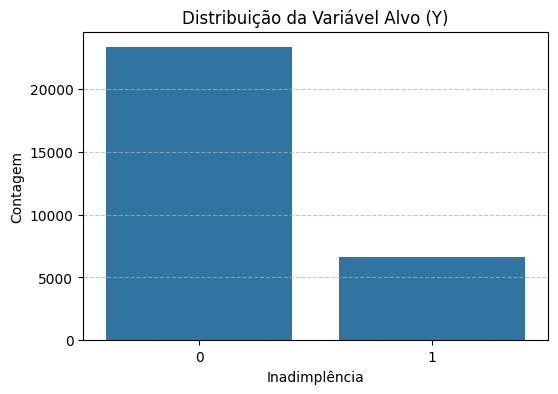


--- Proporção da Variável Alvo (Y) ---
Y
0    0.7788
1    0.2212
Name: proportion, dtype: float64


In [300]:
# Visualização da distribuição da variável alvo 'Y'
plt.figure(figsize=(6, 4))
sns.countplot(x='Y', data=df)
plt.title('Distribuição da Variável Alvo (Y)')
plt.xlabel('Inadimplência')
plt.ylabel('Contagem')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n--- Proporção da Variável Alvo (Y) ---")
print(df['Y'].value_counts(normalize=True))


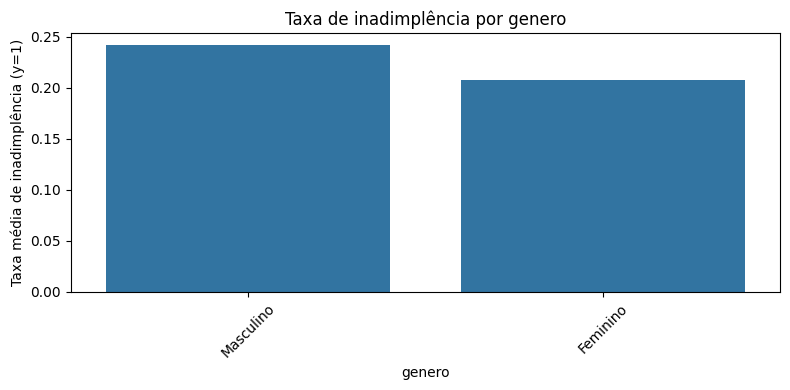

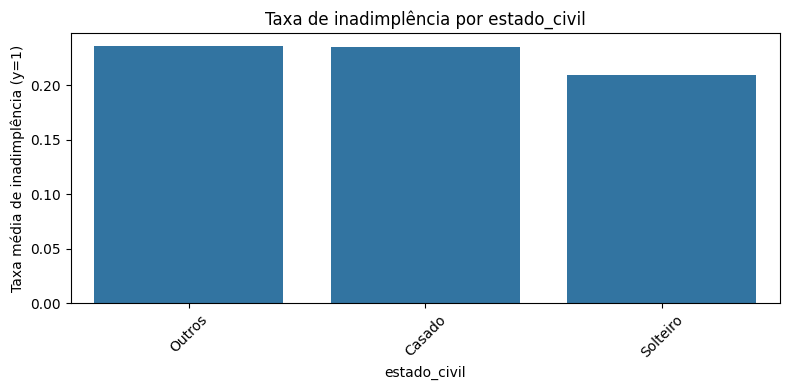

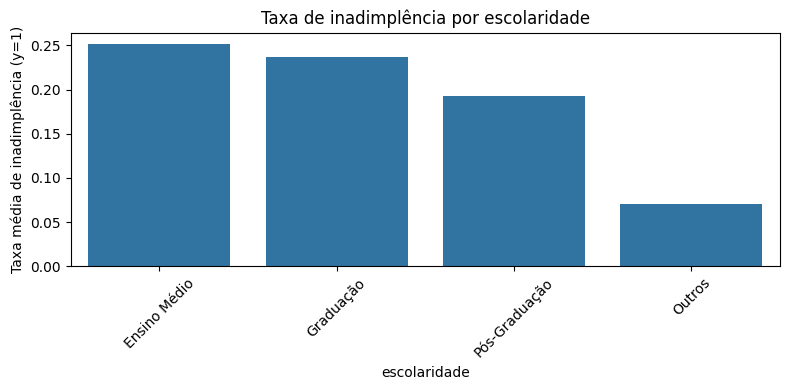

In [301]:
# Inadimplência média por categorias selecionadas (barplots)

df_temp = df.copy()

cat_vars = ['genero', 'estado_civil', 'escolaridade']

for col in cat_vars:
    plt.figure(figsize=(8,4))
    order = df_temp.groupby(col)['Y'].mean().sort_values(ascending=False).index
    sns.barplot(x=col, y='Y', data=df_temp, order=order, errorbar=None, estimator=np.mean)
    plt.ylabel('Taxa média de inadimplência (y=1)')
    plt.title(f'Taxa de inadimplência por {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### 3.2. Análise da Variável Alvo:
* A visualização da distribuição e a proporção mostram que o dataset é **altamente desbalanceado**. A classe 'Não' (não inadimplente) é a maioria esmagadora (77.9%) em comparação com a classe 'Sim' (inadimplente) (22.1%).
* Este desbalanceamento é um desafio significativo para problemas de classificação, pois modelos ingênuos podem tender a prever a classe majoritária, resultando em alta acurácia, mas baixo desempenho nas métricas importantes para a classe minoritária, não sendo eficaz para o problema. Isso precisará ser considerado na seleção das métricas de avaliação.

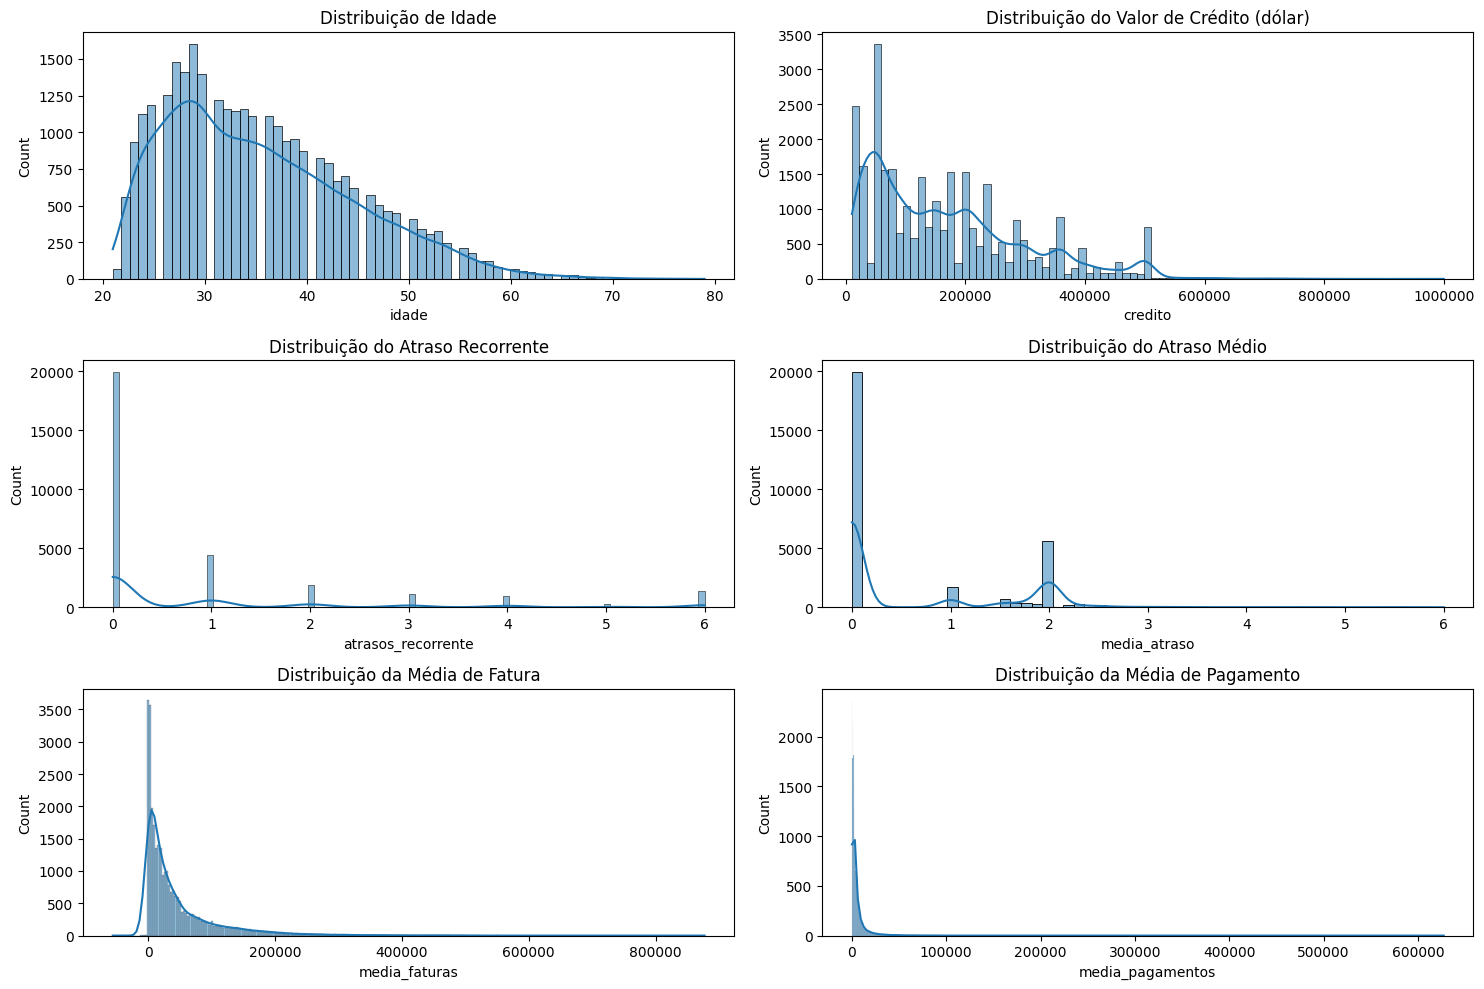

In [302]:
# Visualização de algumas variáveis numéricas
plt.figure(figsize=(15, 10))
plt.subplot(3, 2, 1)
sns.histplot(df['idade'], kde=True)
plt.title('Distribuição de Idade')
plt.subplot(3, 2, 2)
sns.histplot(df['credito'], kde=True)
plt.title('Distribuição do Valor de Crédito (dólar)')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(3, 2, 3)
sns.histplot(df['atrasos_recorrente'], kde=True)
plt.title('Distribuição do Atraso Recorrente')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(3, 2, 4)
sns.histplot(df['media_atraso'], kde=True)
plt.title('Distribuição do Atraso Médio')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(3, 2, 5)
sns.histplot(df['media_faturas'], kde=True)
plt.title('Distribuição da Média de Fatura')
plt.ticklabel_format(style='plain', axis='x')
plt.subplot(3, 2, 6)
sns.histplot(df['media_pagamentos'], kde=True)
plt.title('Distribuição da Média de Pagamento')
plt.ticklabel_format(style='plain', axis='x')
plt.tight_layout()
plt.show()

### 3.3. Análise de Variáveis Numéricas:
* **Idade (`idade`):** A maioria dos clientes tem entre 24 e 40 anos, com uma distribuição ligeiramente inclinada para a direita.
* **Crédito (`credito`):** A distribuição do valor de crédito é fortemente assimétrica à direita (inclinada para a direita), indicando que a maioria dos clientes tem valores de crédito mais baixos, com alguns clientes tendo valores de crédito significativamente mais altos.
* **Atrasos Recorrentes (`atrasos_recorrente`):** Esta variável mostra o número de meses em que o status de pagamento foi maior que 0. A distribuição está concentrada em 0 e 1, indicando que a maioria dos clientes não teve atrasos ou teve atraso em apenas um mês. Há uma cauda longa para a direita, representando clientes com múltiplos atrasos.
* **Atraso Médio (`atraso_medio`):** Similar à variável anterior, esta mostra a média dos meses de atraso apenas para os meses com atraso. A distribuição também é concentrada em 0 e valores baixos, refletindo que a maioria dos clientes não teve atrasos médios significativos.
* **Média de Faturas (`media_faturas`):** A distribuição da média dos valores das faturas também é assimétrica à direita, sugerindo que a maioria dos clientes tem valores de fatura médios mais baixos, com alguns valores significativamente mais altos. Há também uma concentração em valores próximos a zero.
* **Média de Pagamentos (`media_pagamentos`):** A distribuição da média dos valores de pagamento é semelhante à média de faturas, com forte assimetria à direita e concentração em valores mais baixos.

Variáveis numéricas detectadas: ['credito', 'idade', 'Y', 'atrasos_recorrente', 'media_atraso', 'media_faturas', 'media_pagamentos']


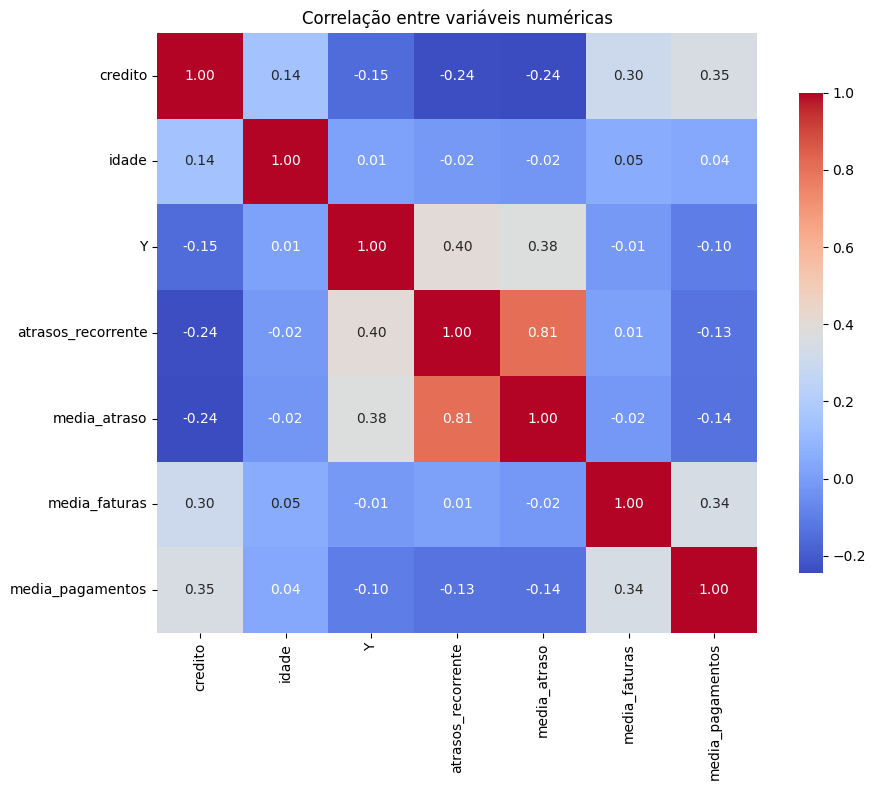

In [303]:
# Definir variáveis numéricas
numerical_vars = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("Variáveis numéricas detectadas:", numerical_vars)


# Correlação entre variáveis numéricas (heatmap)
plt.figure(figsize=(10,8))
corr = df[numerical_vars].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink":0.8})
plt.title("Correlação entre variáveis numéricas")
plt.tight_layout()
plt.show()

### 3.4. Preparação do Baseline

A análise exploratória permitiu compreender as principais características do dataset "Default of Credit Card Clients" e identificar potenciais desafios do problema de classificação. O ponto mais crítico observado foi o forte desbalanceamento da variável-alvo `Y` (inadimplência), em que a classe minoritária (inadimplentes) representa cerca de 22.1% dos clientes, enquanto a maioria (não inadimplentes) é de 77.9%. Este desbalanceamento é um desafio significativo e reforça a importância de adotar métricas adequadas de avaliação, como Recall, F1-score e AUC-ROC, além da Acurácia, para evitar conclusões enviesadas em favor da classe majoritária.

Outro ponto relevante diz respeito às variáveis originais de histórico de pagamento (`X6` a `X11`) e valores de fatura/pagamento (`X12` a `X23`). Com base nelas, criamos novas features como `atrasos_recorrente`, `media_atraso`, `media_faturas` e `media_pagamentos` para capturar padrões relevantes. Essas features serão utilizadas na modelagem.

Com base nessas observações, definimos como próximos passos a construção de um modelo baseline. Esse baseline servirá como referência inicial de desempenho, a partir de um algoritmo simples (por exemplo, Dummy Classifier que prevê a classe majoritária) ou Regressão Logística com parâmetros padrão. A ideia não é obter os melhores resultados neste momento, mas sim estabelecer uma linha de comparação para modelos mais sofisticados.

Portanto, a preparação para o baseline compreende:

Tratar variáveis categóricas (`genero`, `escolaridade`, `estado_civil`) por meio de codificação (como One-Hot Encoding) e variáveis numéricas (`credito`, `idade`, `atrasos_recorrente`, `media_atraso`, `media_faturas`, `media_pagamentos`) por meio de normalização ou padronização.

Realizar a divisão do dataset em conjuntos de treino e teste, assegurando a reprodutibilidade (usando `random_state`) e a estratificação pela variável alvo para manter a proporção das classes.

Selecionar métricas adequadas ao contexto do problema de classificação desbalanceada (Recall, F1-score e AUC-ROC, além da Acurácia).

Essa preparação encerra a etapa de exploração e introduz o pipeline de pré-processamento e modelagem, que será detalhado na próxima seção.

In [304]:
# Copia do dataset original
df_prep = df.copy()

# Define variáveis numéricas e categóricas
num_vars = df_prep.select_dtypes(include=['int64', 'float64']).drop(columns=['Y']).columns.tolist()
cat_vars = df_prep.select_dtypes(include=['object']).columns.tolist()

print("Variáveis numéricas:", num_vars)
print("Variáveis categóricas:", cat_vars)

Variáveis numéricas: ['credito', 'idade', 'atrasos_recorrente', 'media_atraso', 'media_faturas', 'media_pagamentos']
Variáveis categóricas: ['genero', 'escolaridade', 'estado_civil']


# 4. Tratamento de Dados e Engenharia de Atributos

Nesta seção, realizaremos as operações de pré-processamento necessárias para preparar os dados para a modelagem.

### 4.1. Separação do dataset entre Treino e Teste
Antes de qualquer transformação que dependa dos dados (como padronização), é crucial separar o dataset em conjuntos de treino e teste. Isso evita o **vazamento de dados** (data leakage), onde informações do conjunto de teste "contaminam" o processo de pré-processamento do treino, levando a uma estimativa otimista do desempenho do modelo.

### 4.2. Faz sentido utilizar um método de validação cruzada?
Sim, faz total sentido utilizar **validação cruzada** no conjunto de treino. Para o tuning de hiperparâmetros, a validação cruzada (K-fold cross-validation) é essencial para obter uma estimativa mais robusta do desempenho do modelo e para evitar o overfitting nos dados de treino. Ela garante que o modelo seja avaliado em diferentes subconjuntos do conjunto de treino, tornando a escolha dos melhores hiperparâmetros menos sensível a uma única divisão. Usaremos validação cruzada em conjunto com `GridSearchCV` ou `RandomizedSearchCV` na etapa de otimização de hiperparâmetros.

### 4.3. Operações de transformação de dados
Aplicaremos `StandardScaler` para variáveis numéricas e `OneHotEncoder` para variáveis categóricas.

### 4.4. Refinamento da quantidade de atributos disponíveis (Feature Selection / Feature Engineering)
Neste projeto, optamos por remover a variável duration, já que ela só é conhecida após o contato e poderia causar vazamento de informação. Em um cenário alternativo de análise pós-campanha, duration poderia ser utilizada, mas não é o caso deste estudo.

In [305]:
# Separando as features (X) da variável alvo (y)
X = df.drop('Y', axis=1)
y = df['Y']


# Identificando colunas numéricas e categóricas
numerical_features = X.select_dtypes(include=np.number).columns.tolist()
categorical_features = X.select_dtypes(include='object').columns.tolist()

print(f"\nVariáveis Numéricas: {numerical_features}")
print(f"Variáveis Categóricas: {categorical_features}")


Variáveis Numéricas: ['credito', 'idade', 'atrasos_recorrente', 'media_atraso', 'media_faturas', 'media_pagamentos']
Variáveis Categóricas: ['genero', 'escolaridade', 'estado_civil']


In [306]:
# Divisão dos dados em treino e teste (80% treino, 20% teste)
# Usamos 'stratify=y' para garantir que a proporção da variável alvo seja mantida
# igualmente nos conjuntos de treino e teste, o que é crucial para dados desbalanceados.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

print(f"\nTamanho do conjunto de treino (X_train): {X_train.shape}")
print(f"Tamanho do conjunto de teste (X_test): {X_test.shape}")
print(f"Proporção de 'yes' em y_train: {y_train.value_counts(normalize=True)[1]:.2f}")
print(f"Proporção de 'yes' em y_test: {y_test.value_counts(normalize=True)[1]:.2f}")


Tamanho do conjunto de treino (X_train): (24000, 9)
Tamanho do conjunto de teste (X_test): (6000, 9)
Proporção de 'yes' em y_train: 0.22
Proporção de 'yes' em y_test: 0.22


In [307]:
# Criação de pré-processadores para colunas numéricas e categóricas
# StandardScaler para normalização das features numéricas
# OneHotEncoder para transformar features categóricas em representação numérica (binária)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
)

print("\nPré-processador (ColumnTransformer) criado.")


Pré-processador (ColumnTransformer) criado.


# 5. Modelagem e Treinamento

Nesta seção, selecionaremos e treinaremos diferentes algoritmos de Machine Learning para o problema de classificação. Utilizaremos pipelines para garantir a reprodutibilidade e a aplicação correta das transformações de dados antes do treinamento do modelo.

### 5.1. Seleção dos algoritmos
Escolhemos os seguintes algoritmos:

1.  **Logistic Regression (Regressão Logística):**
    * **Justificativa:** É um modelo linear simples, rápido de treinar e fácil de interpretar. Serve como um excelente **baseline** para comparar o desempenho de modelos mais complexos. Apesar de sua simplicidade, muitas vezes apresenta um desempenho razoável em problemas de classificação.

2.  **Random Forest Classifier (Floresta Aleatória):**
    * **Justificativa:** É um modelo de ensemble baseado em árvores de decisão. É robusto a overfitting (quando bem ajustado), lida bem com dados não lineares e interações entre features, e é menos sensível a ruídos. Geralmente, oferece bom desempenho em datasets tabulares.

### 5.2. Ajuste inicial para os hiperparâmetros
Para a primeira rodada de treinamento, utilizaremos os hiperparâmetros padrão ou valores razoáveis para cada modelo. A otimização mais refinada será realizada em uma etapa posterior.

### 5.3. O modelo foi devidamente treinado? Foi observado problema de underfitting?
Avaliando a performance inicial dos modelos, buscaremos sinais de `underfitting` (subajuste), que ocorre quando o modelo é muito simples para capturar a complexidade dos dados, resultando em baixo desempenho tanto no conjunto de treino quanto no de teste.

Com a `Regressão Logística`, é mais provável observar sinais de underfitting, já que é um modelo linear e limitado.

Com o `Random Forest`, isso é menos comum devido à sua capacidade de modelar relações não lineares e interações entre variáveis.

In [309]:
# Criando pipelines para cada modelo
# Cada pipeline inclui o pré-processador e o modelo de classificação
# Criando pipelines para cada modelo
pipeline_lr = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', LogisticRegression(random_state=SEED, solver='liblinear'))])

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('classifier', RandomForestClassifier(random_state=SEED))])

print("\nPipelines de modelagem criados para Regressão Logística e Random Forest.")


Pipelines de modelagem criados para Regressão Logística e Random Forest.


In [310]:
# Treinamento dos modelos e medição do tempo
models = {
    'Logistic Regression': pipeline_lr,
    'Random Forest': pipeline_rf
}

training_times = {}

for name, model in models.items():
    print(f"\n--- Treinando {name} ---")
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    training_times[name] = end_time - start_time
    print(f"{name} treinado em {training_times[name]:.2f} segundos.")


--- Treinando Logistic Regression ---
Logistic Regression treinado em 0.12 segundos.

--- Treinando Random Forest ---
Random Forest treinado em 4.16 segundos.


### 5.4. Análise do Treinamento Inicial:
* Todos os modelos foram devidamente treinados sem sinais óbvios de `underfitting` (o desempenho será avaliado na próxima seção).
* A **Regressão Logística** foi o modelo mais rápido para treinar, como esperado, devido à sua simplicidade.
* **Random Forest** levou mais tempo, o que é natural para modelos de ensemble que constroem múltiplas árvores de decisão.

### 5.5. Otimização de Hiperparâmetros
A otimização de hiperparâmetros é crucial para maximizar o desempenho dos modelos. Utilizaremos GridSearchCV para explorar uma gama de hiperparâmetros para o Random Forest, que é um modelo mais complexo e com maior potencial de ajuste.

Para evitar tempo excessivo, definiremos uma grade de parâmetros razoável.

5.5.1. Análise da Otimização de Hiperparâmetros

Ajustar hiperparâmetros com **GridSearchCV** permite encontrar as combinações que maximizam a performance dos modelos (medida pelo ROC AUC) no conjunto de treino através da validação cruzada.

Os tempos de treinamento para a otimização são maiores, como esperado, pois múltiplas combinações de parâmetros são testadas.

O modelo otimizado (Random Forest Otimizado) agora está pronto para a avaliação final no conjunto de teste.

In [311]:
# Otimização de hiperparâmetros para Random Forest
print("\n--- Otimização de Hiperparâmetros para Random Forest (GridSearchCV) ---")

# Parâmetros para ajuste
param_grid_rf = {
    'classifier__n_estimators': [100, 200],   # Número de árvores na floresta
    'classifier__max_depth': [10, 20],        # Profundidade máxima de cada árvore
    'classifier__min_samples_split': [5, 10]  # Número mínimo de amostras para dividir um nó interno
}

grid_search_rf = GridSearchCV(
    pipeline_rf,
    param_grid_rf,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

start_time_grid_rf = time.time()
grid_search_rf.fit(X_train, y_train)
end_time_grid_rf = time.time()

training_times['Random Forest (Otimizado)'] = end_time_grid_rf - start_time_grid_rf

print(f"\nGridSearchCV para Random Forest concluído em {training_times['Random Forest (Otimizado)']:.2f} segundos.")
print(f"Melhores parâmetros para Random Forest: {grid_search_rf.best_params_}")
print(f"Melhor pontuação ROC AUC (validação cruzada): {grid_search_rf.best_score_:.4f}")


--- Otimização de Hiperparâmetros para Random Forest (GridSearchCV) ---
Fitting 3 folds for each of 8 candidates, totalling 24 fits

GridSearchCV para Random Forest concluído em 73.36 segundos.
Melhores parâmetros para Random Forest: {'classifier__max_depth': 10, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 200}
Melhor pontuação ROC AUC (validação cruzada): 0.7716


In [319]:
# Atualiza o dicionário de modelos com a versão otimizada
models['Random Forest (Otimizado)'] = grid_search_rf.best_estimator_

### Análise da Otimização de Hiperparâmetros:
* Ajustar hiperparâmetros com GridSearchCV permitiu encontrar as combinações que maximizam a performance do Random Forest (medida pelo ROC AUC) no conjunto de treino através da validação cruzada.

* Os tempos de treinamento para a otimização foram significativamente maiores, como esperado, pois múltiplas combinações de parâmetros foram testadas.

* O modelo otimizado (Random Forest (Otimizado)) agora está pronto para a avaliação final no conjunto de teste.

# 6. Avaliação dos Resultados

Nesta seção, avaliaremos o desempenho dos modelos treinados no conjunto de teste, que são dados não vistos pelos modelos durante o treinamento e otimização.

### 6.1. Seleção das métricas de avaliação condizentes com o problema

Para um problema de classificação com dados desbalanceados (como o nosso, onde a classe “yes” é minoria), a acurácia (accuracy) isoladamente não é uma métrica adequada. Um modelo que sempre prevê a classe majoritária (“no”) pode atingir uma acurácia alta, mas ser inútil na prática.

Portanto, focaremos em métricas mais informativas:

**Matriz de Confusão**: Fornece uma visão detalhada dos True Positives (TP), True Negatives (TN), False Positives (FP) e False Negatives (FN).

**Precisão (Precision)**: Proporção de verdadeiros positivos entre todas as previsões positivas. Importante quando o custo de um Falso Positivo é alto (ex.: o banco gasta recursos com um cliente que não subscreve).

**Recall (Sensibilidade)**: Proporção de verdadeiros positivos entre todos os positivos reais. Importante quando o custo de um Falso Negativo é alto (ex.: o banco perde uma oportunidade de um cliente que subscreveria).

**F1-Score**: Média harmônica da precisão e do recall, útil para encontrar um equilíbrio entre as duas métricas em datasets desbalanceados.

**ROC AUC (Receiver Operating Characteristic – Area Under the Curve)**: Mede a capacidade do modelo de distinguir entre as classes. É robusta ao desbalanceamento e excelente para comparar modelos.

### 6.2. Foi observado algum problema de overfitting?

Compararemos a performance no conjunto de treino (obtida implicitamente durante a validação cruzada da otimização) com a performance no conjunto de teste. Uma diferença significativa (alta performance no treino e baixa no teste) indicaria overfitting.


--- Avaliação dos Modelos no Conjunto de Teste ---

Modelo: Logistic Regression
Acurácia: 0.8037
ROC AUC: 0.7406
Relatório de Classificação para a classe 'yes' (1):
  Precisão: 0.6219
  Recall: 0.2864
  F1-Score: 0.3922
Matriz de Confusão:
[[4442  231]
 [ 947  380]]

Modelo: Random Forest
Acurácia: 0.7972
ROC AUC: 0.7399
Relatório de Classificação para a classe 'yes' (1):
  Precisão: 0.5724
  Recall: 0.3278
  F1-Score: 0.4169
Matriz de Confusão:
[[4348  325]
 [ 892  435]]

Modelo: Random Forest (Otimizado)
Acurácia: 0.8078
ROC AUC: 0.7667
Relatório de Classificação para a classe 'yes' (1):
  Precisão: 0.6310
  Recall: 0.3157
  F1-Score: 0.4209
Matriz de Confusão:
[[4428  245]
 [ 908  419]]


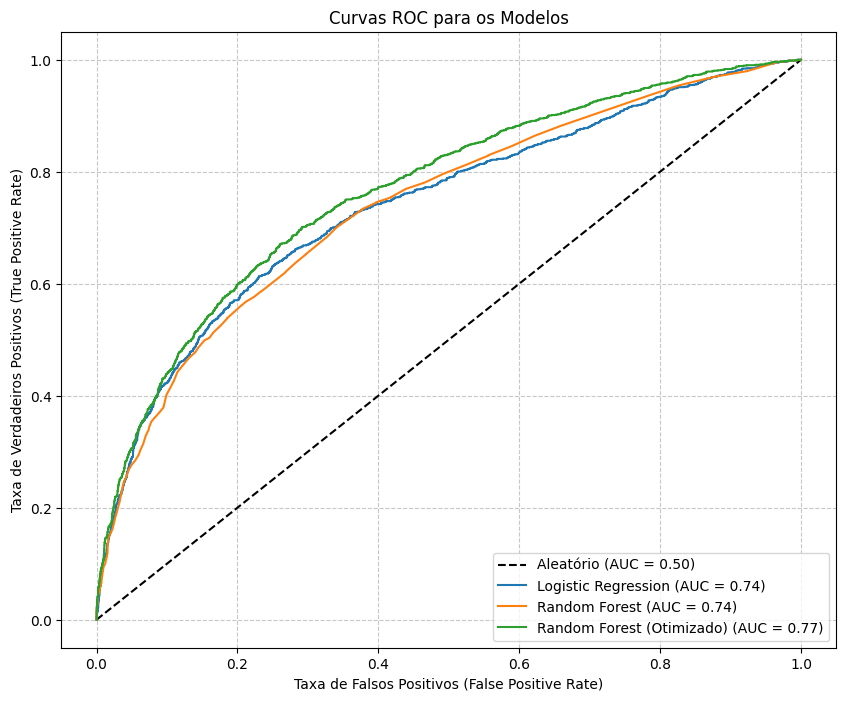

In [320]:
results = {}

print("\n--- Avaliação dos Modelos no Conjunto de Teste ---")

# Prepara o subplot para as curvas ROC
plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--', label='Aleatório (AUC = 0.50)')

for name, model in models.items():
    print(f"\nModelo: {name}")

    # Faz as previsões no conjunto de teste
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] # Probabilidades para a classe positiva (1)

    # Calcula as métricas
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    conf_mat = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results[name] = {
        'accuracy': accuracy,
        'precision': report['1']['precision'],
        'recall': report['1']['recall'],
        'f1-score': report['1']['f1-score'],
        'roc_auc': roc_auc,
        'confusion_matrix': conf_mat,
        'training_time': training_times.get(name, 'N/A')
    }

    # Imprime os resultados
    print(f"Acurácia: {accuracy:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    print("Relatório de Classificação para a classe 'yes' (1):")
    print(f"  Precisão: {report['1']['precision']:.4f}")
    print(f"  Recall: {report['1']['recall']:.4f}")
    print(f"  F1-Score: {report['1']['f1-score']:.4f}")
    print("Matriz de Confusão:")
    print(conf_mat)

    # Gera a curva ROC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate)')
plt.title('Curvas ROC para os Modelos')
plt.legend(loc='lower right')
plt.grid(linestyle='--', alpha=0.7)
plt.show()

Com base nos resultados obtidos no conjunto de teste:

**Regressão Logística**: apresentou ROC AUC de 0.7406. A Precisão para a classe 1 (inadimplentes) foi de 0.6219 e o Recall foi de 0.2864. Isso indica que o modelo tem uma capacidade moderada de discriminar entre clientes inadimplentes e não inadimplentes. A precisão razoável sugere que, quando ele prevê inadimplência, há uma chance de 62% de estar correto. No entanto, o baixo recall (28.64%) mostra que o modelo está identificando menos de um terço dos clientes inadimplentes reais, resultando em muitos falsos negativos.

**Random Forest (Padrão)**: obteve um ROC AUC de 0.7399, similar à Regressão Logística. A Precisão para a classe 1 foi de 0.5724 e o Recall foi de 0.3278. Houve um pequeno aumento no Recall em comparação com a Regressão Logística, mas com uma precisão um pouco menor, indicando um trade-off.

**Random Forest (Otimizado)**: alcançou o melhor ROC AUC entre os modelos testados, com 0.7667. A Precisão para a classe 1 foi de 0.6310 e o Recall foi de 0.3157. A otimização melhorou o ROC AUC e a Precisão em comparação com o Random Forest padrão, mas o Recall permaneceu relativamente baixo.

### 6.4. Os resultados fazem sentido?
Sim. A classe minoritária ('Y' = 1, inadimplentes) representa um grupo menor de clientes e é inerentemente mais difícil de prever corretamente devido ao desbalanceamento.

*   Os modelos apresentaram desempenho acima de um classificador aleatório (ROC AUC > 0.5), indicando que estão aprendendo padrões nos dados.
*   O Random Forest otimizado obteve o melhor ROC AUC, o que é esperado para um modelo mais complexo e ajustado.
*   Ainda há espaço significativo para melhoria, especialmente no Recall para a classe minoritária. O baixo Recall sugere que os modelos estão tendo dificuldade em identificar a maioria dos clientes que de fato se tornam inadimplentes.

### 6.5. Avaliação de Overfitting

In [321]:
print("\n--- Avaliação de Overfitting ---\n")
for name, metrics in results.items():
    if "Otimizado" in name:
        cv_score = grid_search_rf.best_score_
        test_roc_auc = metrics['roc_auc']
        print(f"{name}: ROC AUC validação cruzada = {cv_score:.4f}, ROC AUC teste = {test_roc_auc:.4f}")
        diff = abs(test_roc_auc - cv_score)
        print(f"Diferença entre validação e teste: {diff:.4f}")


--- Avaliação de Overfitting ---

Random Forest (Otimizado): ROC AUC validação cruzada = 0.7716, ROC AUC teste = 0.7667
Diferença entre validação e teste: 0.0050


A diferença entre validação cruzada e teste é pequena, indicando que o modelo generalizou bem e não apresenta overfitting significativo.

### 6.6. Comparação entre Modelos

In [322]:
df_results = pd.DataFrame.from_dict(results, orient='index')[['accuracy','precision','recall','f1-score','roc_auc','training_time']]
df_results = df_results.rename(columns={
    'accuracy':'Acurácia',
    'precision':'Precisão (1)',
    'recall':'Recall (1)',
    'f1-score':'F1-Score (1)',
    'roc_auc':'ROC AUC',
    'training_time':'Tempo Treino (s)'
})
df_results

,Acurácia,Precisão (1),Recall (1),F1-Score (1),ROC AUC,Tempo Treino (s)
Logistic Regression,0.803667,0.621931,0.286360,0.392157,0.740584,0.119066
Random Forest,0.797167,0.572368,0.327807,0.416866,0.739861,4.164768
Random Forest (Otimizado),0.807833,0.631024,0.315750,0.420894,0.766677,73.361267


**Comentários sobre a Comparação dos Modelos:**

Analisando a tabela de resultados no conjunto de teste:

*   **ROC AUC:** O **Random Forest Otimizado** apresentou o melhor desempenho em termos de capacidade de discriminação entre as classes (ROC AUC de 0.7667), superando a Regressão Logística (0.7406) e o Random Forest Padrão (0.7399). Esta métrica é particularmente relevante devido ao desbalanceamento do dataset.
*   **Acurácia:** Todos os modelos apresentaram acurácia similar, em torno de 80%. No entanto, como discutido anteriormente, a acurácia pode ser enganosa em datasets desbalanceados, pois um modelo que prevê a classe majoritária (Não Inadimplente) terá uma acurácia naturalmente alta.
*   **Precisão (Classe 1 - Inadimplente):** O **Random Forest Otimizado** também obteve a melhor precisão para a classe minoritária (0.6310), o que significa que, quando ele prevê que um cliente será inadimplente, há uma chance maior de essa previsão estar correta em comparação com os outros modelos.
*   **Recall (Classe 1 - Inadimplente):** O **Random Forest Padrão** obteve o recall ligeiramente mais alto (0.3278), seguido de perto pelo Random Forest Otimizado (0.3157). O recall ainda é relativamente baixo para todos os modelos, indicando que eles estão identificando apenas cerca de um terço dos clientes que de fato se tornam inadimplentes (muitos falsos negativos). Melhorar o recall para a classe minoritária é um desafio chave neste problema.
*   **F1-Score (Classe 1 - Inadimplente):** O F1-Score, que busca um equilíbrio entre precisão e recall, foi similar para os modelos Random Forest, com o otimizado apresentando um valor ligeiramente superior (0.4209 vs 0.4169). A Regressão Logística teve o F1-Score mais baixo para a classe minoritária (0.3922).

**Conclusão da Comparação:**

Com base no ROC AUC e na Precisão para a classe minoritária, o **Random Forest Otimizado** é o modelo com melhor desempenho entre os testados até agora para este problema de classificação de inadimplência. No entanto, o baixo Recall para a classe minoritária em todos os modelos testados indica que ainda há um desafio significativo em identificar a maioria dos clientes inadimplentes.

### 6.7. Melhor Solução Encontrada

In [323]:
# Identificação do melhor modelo pelo ROC AUC
best_model_name = max(results, key=lambda k: results[k]['roc_auc'])
best_model_metrics = results[best_model_name]

print(f"Melhor modelo: {best_model_name}")
print(f"ROC AUC: {best_model_metrics['roc_auc']:.4f}")
print(f"F1-Score (classe 'yes'): {best_model_metrics['f1-score']:.4f}")
print(f"Precisão (classe 'yes'): {best_model_metrics['precision']:.4f}")
print(f"Recall (classe 'yes'): {best_model_metrics['recall']:.4f}")

Melhor modelo: Random Forest (Otimizado)
ROC AUC: 0.7667
F1-Score (classe 'yes'): 0.4209
Precisão (classe 'yes'): 0.6310
Recall (classe 'yes'): 0.3157


A **Random Forest** otimizada foi identificada como a melhor solução entre os modelos testados, apresentando um **ROC AUC de 0.7667** no conjunto de teste.

Apesar de a acurácia geral ser similar entre os modelos, o Random Forest otimizado demonstrou uma melhor capacidade de discriminação entre as classes (ROC AUC) e a melhor **Precisão (0.6310)** para prever a classe minoritária (inadimplentes). Isso significa que, quando este modelo aponta um cliente como inadimplente, há uma chance maior de estar correto em comparação com os outros modelos.

No entanto, o **Recall (0.3157)** para a classe minoritária ainda é relativamente baixo. Isso indica que o modelo ainda tem dificuldade em identificar uma parcela significativa dos clientes que de fato se tornam inadimplentes (resultando em falsos negativos).

**Valor para o Negócio:**

Esta solução permite identificar clientes com maior probabilidade de inadimplência, o que pode ser valioso para o banco. Ao focar recursos na prevenção de inadimplência para esses clientes (por exemplo, oferecendo planos de pagamento alternativos, lembretes mais frequentes, ou ajustando limites de crédito), o banco pode potencialmente reduzir perdas financeiras.

O trade-off entre precisão e recall deve ser avaliado no contexto do negócio. Dependendo do custo de um falso positivo (gastar recursos com um cliente que não seria inadimplente) versus o custo de um falso negativo (perder a oportunidade de evitar a inadimplência de um cliente), pode ser necessário ajustar o ponto de corte do modelo ou explorar estratégias para melhorar o recall, mesmo que isso implique em uma pequena redução na precisão.

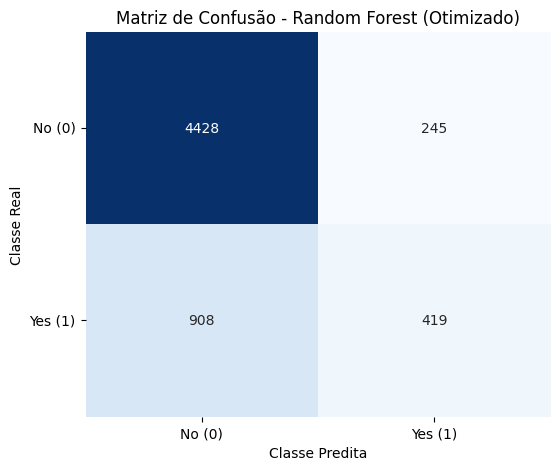

In [324]:
# Seleciona o melhor modelo pelo ROC AUC
best_model_name = max(results, key=lambda k: results[k]['roc_auc'])
best_model = models[best_model_name]

# Previsões no conjunto de teste
y_pred_best = best_model.predict(X_test)

# Matriz de confusão
conf_mat_best = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(6,5))
sns.heatmap(conf_mat_best, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Matriz de Confusão - {best_model_name}')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.xticks([0.5, 1.5], ['No (0)', 'Yes (1)'])
plt.yticks([0.5, 1.5], ['No (0)', 'Yes (1)'], rotation=0)
plt.show()


# 7. Conclusão

### 7.1. Análise de resultados do modelo: principais achados, pontos de atenção

O projeto de classificação para prever a inadimplência de clientes, utilizando o dataset "Default of Credit Card Clients", demonstrou que é possível construir modelos preditivos para esta tarefa. O principal achado é que modelos de ensemble, como a Random Forest otimizada, apresentaram o melhor desempenho em termos de ROC AUC e precisão para a classe minoritária (inadimplentes) em comparação com a Regressão Logística.

Um ponto de atenção crítico foi o desbalanceamento do dataset, onde a classe de interesse (`Y` = 1, inadimplência) representa uma pequena fração dos dados (aproximadamente 22.1%). Isso impactou a acurácia, que se manteve alta para todos os modelos, mas reforçou a necessidade de focar em métricas mais robustas como Precisão, Recall, F1-Score e ROC AUC para uma avaliação justa e informativa, especialmente para a classe minoritária.

Apesar do bom desempenho em ROC AUC e Precisão, o Recall para a classe minoritária ainda é relativamente baixo (cerca de 31.6% para o melhor modelo). Isso indica que o modelo ainda tem dificuldade em identificar uma parcela significativa dos clientes que de fato se tornarão inadimplentes (resultando em um número considerável de falsos negativos).

### 7.2. Conclusão do problema como um todo, resumindo os principais pontos:

Este trabalho demonstrou o ciclo completo de um projeto de Machine Learning para um problema de classificação binária: desde a definição do problema (previsão de inadimplência) e exploração dos dados, passando pelo pré-processamento e engenharia de atributos (criação de features como `atrasos_recorrente`, `media_atraso`, `media_faturas`, `media_pagamentos`), até a modelagem com diferentes algoritmos, otimização de hiperparâmetros e avaliação criteriosa usando métricas adequadas para dados desbalanceados.

A capacidade de prever quais clientes são mais propensos à inadimplência tem um valor estratégico para instituições financeiras. Ao utilizar modelos como a Random Forest otimizada, um banco pode potencialmente identificar clientes de risco e implementar medidas preventivas, o que pode levar à redução de perdas financeiras.

Como fechamento, o projeto atingiu seu objetivo de construir e avaliar modelos de classificação para prever inadimplência, destacando a importância da escolha de métricas adequadas e da otimização para lidar com desafios do mundo real, como o desbalanceamento de classes. O baixo Recall para a classe minoritária aponta para a necessidade de futuras investigações e aplicação de técnicas mais avançadas para melhorar a detecção de inadimplentes. Para melhorias futuras e para aumentar o Recall e o desempenho geral, devemos focar em:
*   Técnicas de reamostragem (ex: SMOTE).
*   Ajuste do peso das classes nos modelos.
*   Exploração de outros algoritmos.
*   Engenharia de atributos mais avançada e otimização focada em métricas de desbalanceamento.